# Introducción

Como Data Analyst, el trabajo consiste en analizar datos para extraer información valiosa y tomar decisiones basadas en ellos. Esto implica diferentes etapas, como la descripción general de los datos, el preprocesamiento y ayudar a optimizar los gastos de marketing..

Siempre que se investiga, es necesario saber cómo los clientes usan el servicio, cuándo empiezan a comprar, cuánto dinero aporta cada cliente a la compañía y cuándo los ingresos cubren el costo de adquisición de los clientes. Para tomar las decisiones correctas, una empresa debe ser capaz de entender si está haciendo las suposiciones correctas.

En este proyecto, se tiene como objetivo optimizar los gastos de marketing. Estudiar los informes, calcular las métricas y poe último aconsejar a los expertos de marketing cuánto dinero debeninvertir y que plataforma es recomendable.

# Paso 1. Carga los datos y prepáralos para el análisis

In [1]:
# Cargar todas las librerías
import pandas as pd
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats as st
from scipy.stats import ttest_ind

In [2]:
# Carga de archivo de datos en el DataFrames
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

# visits DataFrame

In [3]:
#Imprime la información general/resumida sobre el DataFrame visits
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
#Imprime una muestra de los datos para visits
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# Imprime la descripción general/resumen estadístico sobre el DataFrame visits
df_visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
#Bucle para reemplazo de los nombres de las columnas en minúsculas.
#df_visits.columns.str.lower()

new_col_names = []

for old_name in df_visits.columns:
    # Luego, pon todas las letras en minúsculas
    name_lowered = old_name.lower()
    # Después, reemplaza los espacios entre palabras por guiones bajos
    name_no_space = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_no_space)

# Reemplaza los nombres anteriores por los nuevos
df_visits.columns = new_col_names

print(df_visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [7]:
#Reemplazo de los espacios con guiones bajos
#df_visits.columns.str.lower().str.replace(' ', '_')

In [8]:
#Trnasformar object a category
df_visits['device'] = df_visits['device'].astype('category')

In [9]:
#Trnasformar object to_datetime()
df_visits['start_ts'] =  pd.to_datetime(df_visits['start_ts'], format="%Y-%m-%d %H:%M:%S")
df_visits['end_ts'] =  pd.to_datetime(df_visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
df_visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [10]:
#Para encontrar el tamaño exacto de los datos
df_visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Se puede observar que el dataframes 'df_visits' no poseen valores ausentes; sin embargo, se tuvo que cambiar algunos tipos de columnas como el tipo object al tipo category, las columnas de fecha se transformo en formato datetime, tambien se transformaron las columnas a minusculas y se reemplazaron los espacios entre palabra con la finalidad de enriquecer y optimizar los datos.

# orders DataFrame

In [11]:
#Imprime la información general/resumida sobre el DataFrame orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
#Imprime una muestra de los datos para orders
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
# Imprime la descripción general/resumen estadístico sobre el DataFrame orders
df_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [14]:
#Bucle para reemplazo de los nombres de las columnas en minúsculas.

new_col_names = []

for old_name in df_orders.columns:
    # Luego, pon todas las letras en minúsculas
    name_lowered = old_name.lower()
    # Después, reemplaza los espacios entre palabras por guiones bajos
    name_no_space = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_no_space)

# Reemplaza los nombres anteriores por los nuevos
df_orders.columns = new_col_names

print(df_orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [15]:
#Trnasformar object to_datetime()
df_orders['buy_ts'] =  pd.to_datetime(df_orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
df_orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Se puede observar que el dataframes 'df_orders', tiene los mismos aspectos que el dataframe anterior, no poseen valores ausentes; sin embargo, se tuvo que cambiar algunos tipos de columnas tal como 'buy_ts' se transformo en formato datetime, tambien se transformaron las columnas a minusculas y se reemplazaron los espacios entre palabra con la finalidad de enriquecer y optimizar los datos.

# costs DataFrame

In [16]:
#Imprime la información general/resumida sobre el DataFrame costs
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
#Imprime una muestra de los datos para costs
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [18]:
# Imprime la descripción general/resumen estadístico sobre el DataFrame costs
df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [19]:
#Trnasformar object to_datetime()
df_costs['dt'] =  pd.to_datetime(df_costs['dt'], format="%Y-%m-%d %H:%M:%S")
df_costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Por último, see puede observar que el dataframes 'df_costs', tiene los mismos aspectos que los dos dataframes anteriores, no poseea valores ausentes; sin embargo, se tuvo que cambiar algunos tipos de columnas tal como 'dt' se transformo en formato datetime con la finalidad de enriquecer y optimizar los datos.

# Paso 2. Haz informes y calcula métricas 

1. Visitas: 

• ¿Cuántas personas lo usan cada día, semana y mes?

In [20]:
#Para calcular la actividad día, semanal y mensual, primero crearemos columnas separadas para los valores de día, semana y mes.
df_visits['session_date'] = df_visits['start_ts'].dt.date
df_visits['session_week']  = df_visits['start_ts'].dt.month #.astype('datetime64[W]')
df_visits['session_month'] = df_visits['start_ts'].dt.month #.astype('datetime64[W]')
df_visits['session_year'] = df_visits['start_ts'].dt.year

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,12,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,7,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,5,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,12,12,2017


In [21]:
#Dividir datos en tipos de dispositivos para ver las diferencias
visit_touch = df_visits.loc[df_visits.device == 'touch']
visit_desktop = df_visits.loc[df_visits.device == 'desktop']

In [22]:
#Ahora vamos a calcular las métricas. Agruparemos los datos por fecha/semana de la sesión y buscaremos las medias:
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('Promedio de usuarios por día: ', int(dau_total))
print('Promedio de usuarios por semana: ', int(wau_total))
print('Promedio de usuarios por mes: ', int(mau_total))



Promedio de usuarios por día:  907
Promedio de usuarios por semana:  23228
Promedio de usuarios por mes:  23228


In [23]:
#Agruparemos los datos por día, semana y mes y luego gráficar
dau = df_visits.groupby('session_date').agg({'uid': 'nunique'})
wau = df_visits.groupby('session_week').agg({'uid': 'nunique'})
mau = df_visits.groupby('session_month').agg({'uid': 'nunique'})

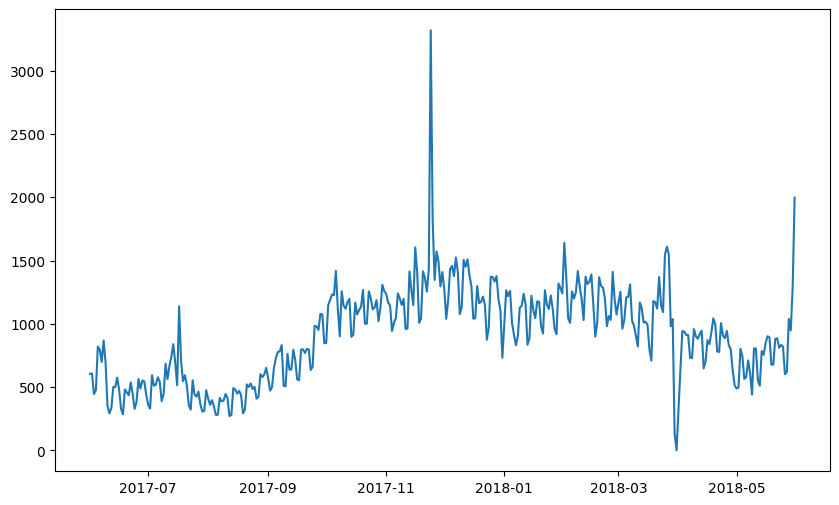

In [24]:
#Grafica de DAU
fig = plt.figure(figsize =(10, 6))
plt.plot(dau)
plt.show()

Con base a la información analizada, en el gráfico, se puede visualizar que los usuarios diarios activos hay un pico alto finalizando el año 2017, se reduce después de marzo del 2018, y vuelve a subir en mayo del 2018.

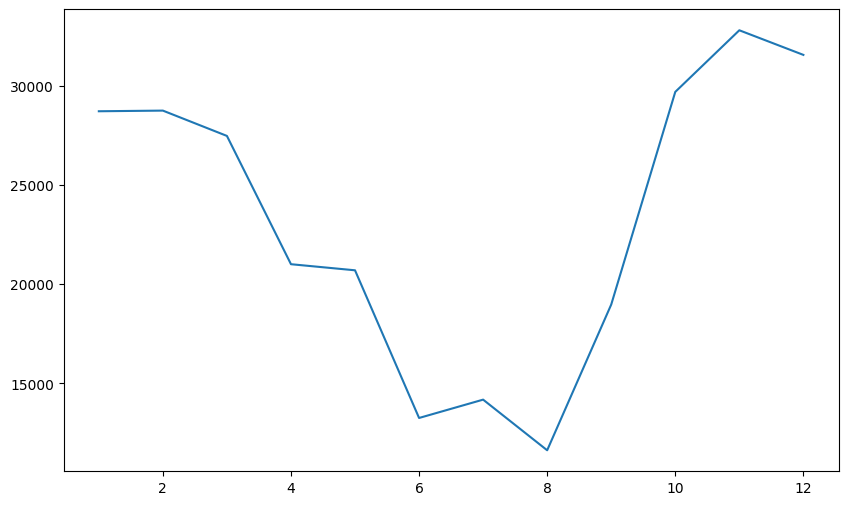

In [25]:
#Grafica de WAU
fig = plt.figure(figsize =(10, 6))
plt.plot(wau)
plt.show()

Según los datos analizados que arroja el gráfico, se puede apreciar que en los usuarios semanales activos hay un pico alto finalizando el año 2017, luego, se reduce después de marzo del 2018 y vuelve a bajar en mayo del 2018.

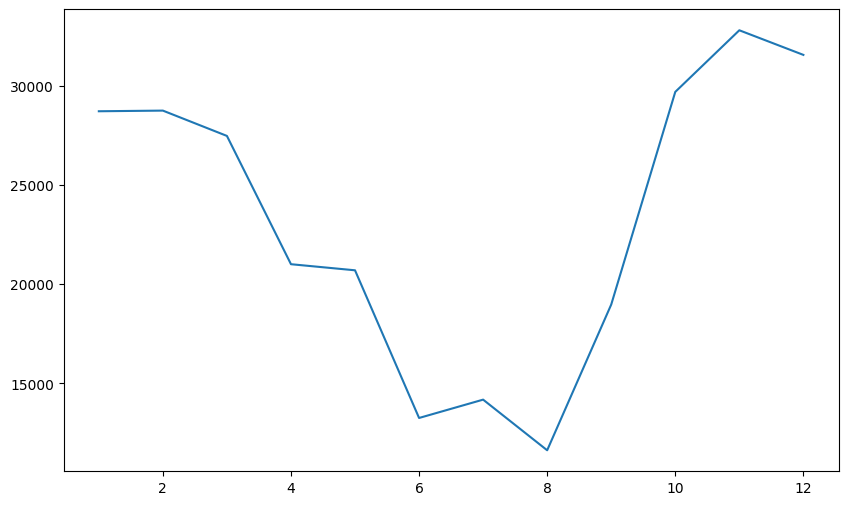

In [26]:
#Grafica de MAU
fig = plt.figure(figsize =(10, 6))
plt.plot(mau)
plt.show()

Con base la información procesada y mostrada en el gráfico, se puede apreciar que los usuarios mensuales activos existe un pico alto finalizando el año 2017, se reduce después de marzo del 2018 y se estabiliza en mayo del 2018.

• ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [27]:
#Solo se divide el número de sesiones entre el número de usuarios para un período determinado
sessions_per_user = df_visits.groupby(['session_date']).agg({'uid': ['count', 'nunique']})

sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [28]:
#Promedio de sesiones
avg_sessions_per_user = sessions_per_user.mean()
avg_sessions_per_user

n_sessions           987.362637
n_users              907.991758
sessions_per_user      1.082170
dtype: float64

<AxesSubplot:>

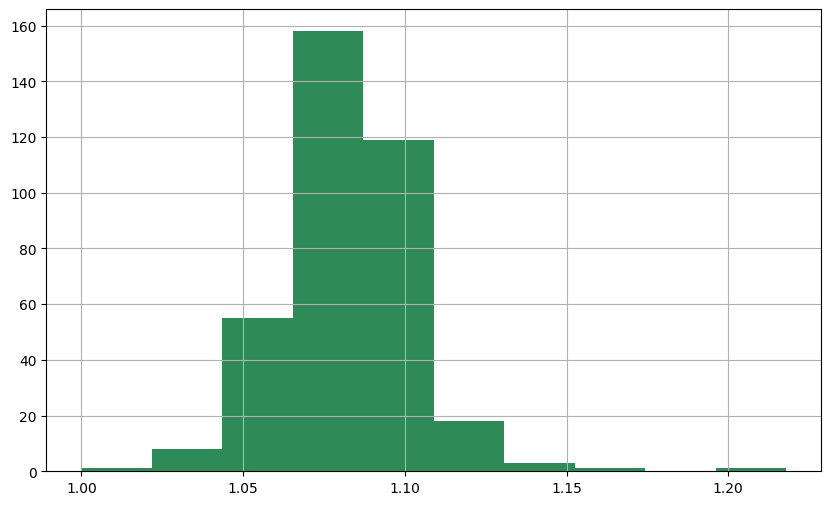

In [29]:
fig = plt.figure(figsize =(10, 6))
sessions_per_user['sessions_per_user'].hist(bins=10, color='seagreen')

Con base a la información analizada y obtenida se puede observar que las sesiones de usuarios promedio donde más se concentra por cada usuario en el sitio web, se mantiene entre un rango de 1.07 a 1.09 sesiones por usuario.

• ¿Cuál es la duración de cada sesión?

In [30]:
#La duración media de la sesión,es la cantidad de tiempo que los usuarios y las usuarias pasan con un producto en la sesión promedio.
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print(df_visits['session_duration_sec'].mode())

0    60
dtype: int64


In [31]:
df_visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

<AxesSubplot:>

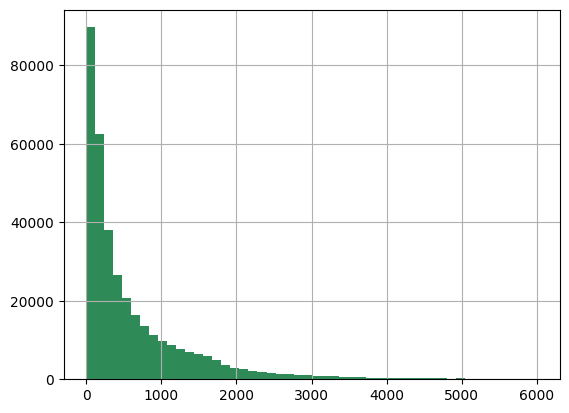

In [32]:
df_visits['session_duration_sec'].hist(bins=50, color='seagreen', range=(0, 6000))

Con base a los análisis realizado se establece que la duración media de la sesión,es la cantidad de tiempo que los usuarios  pasan con un producto en la sesión y el timpo más habitual por usuario en el sitio web es de 60 segundos. Se decidió utilizar la moda y no la media para el cálculo de la duración media, debido a que la distribucion no es normal ni casi normal. Por este motivo, la moda será un mejor indicador.

• ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [33]:
sticky_wau = dau_total / wau_total * 100
print(sticky_wau)
sticky_mau = dau_total / mau_total * 100
print(sticky_mau)


uid    3.90897
dtype: float64
uid    3.90897
dtype: float64


Después de realizar el análisis de las métricas se pudo observar que el promedio es de 907 usuarios únicos activos diarios, 5716 usuarios activos semanales y 23228 usuarios activos mensuales. Asimismo, se pudo observar que tan leal puede ser la audiencia con la métrica sticky factor; para ver con que frecuencia regresan, de forma semanal existe una frecuencia de promedio de 15 usuarios que regresan y mensualmente con un promedio de 3 usuarios que podrían regresar.

In [34]:
"""Definir el evento y el período para crear cohortes en consecuencia. 
Tomar la fecha en que el usuario estuvo activo por primera vez en la aplicación."""
#Crear columna con fecha de primera visita y unirla a visitas df
first_visit_datetime = df_visits.groupby('uid')['start_ts'].min()
first_visit_datetime.name = 'first_visit_date'
visits = df_visits.join(first_visit_datetime ,on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,12,12,2017,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2,2,2018,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,7,7,2017,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,5,5,2018,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,12,12,2017,0,2017-12-27 14:06:00


In [35]:
#Formar cohortes por mes de compra
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [36]:
#Se crea una tabla dinámica para encontrar cuántas personas continúan realizando compras 
#en los meses siguientes al mes de la primera compra.
absolute_values = visits.pivot_table(index='first_visit_month', columns='visit_month', values='uid', aggfunc='nunique')
absolute_values

visit_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


In [37]:
#Encontrar la vida útil de la cohorte
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
#Convertir timedelta64 al número de meses entre las dos fechas
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
#Redondea los valores de la columna cohort_lifetime y luego conviértelos a números enteros
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
#Agrupe los datos por cohorte y vida útil y encuentre la cantidad de usuarios activos en un determinado mes de vida para cada cohorte.
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#Encuentre el número inicial de usuarios en la cohorte observando el mes 0
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
#Cambiar el nombre de la columna user_id
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
#Unir los datos de cohortes con el número inicial de usuarios de la cohorte
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')


In [38]:
#Calcule la tasa de retención. Divida la cantidad de usuarios activos en cada semana por la cantidad inicial de usuarios en la cohorte
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum').round(2)
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,1.0,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,NaN
2017-08-01,1.0,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,NaN,NaN
2017-09-01,1.0,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,NaN,NaN,NaN
2017-10-01,1.0,0.08,0.05,0.04,0.03,0.03,0.02,0.02,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.08,0.04,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.06,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.06,0.04,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.06,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


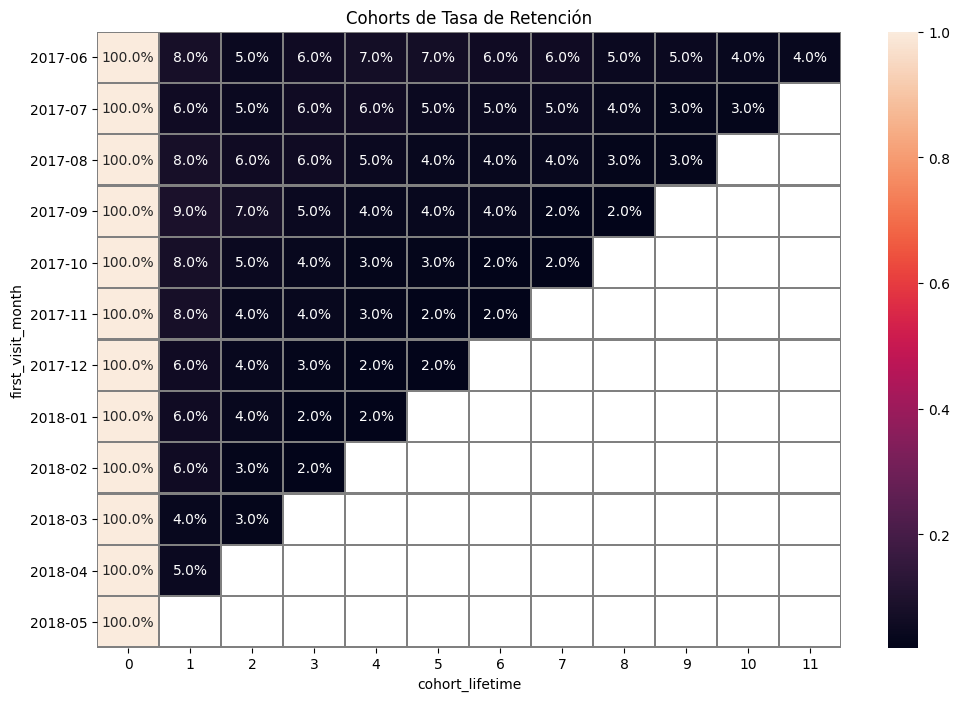

In [39]:
#Hacer un mapa de calor para pivotar la tasa de retención

plt.figure(figsize=(12, 8))
# Titulo de la gráfica
plt.title('Cohorts de Tasa de Retención')
# gráficar el heatmap
sns.heatmap(retention_pivot, annot=True, 
            fmt='.1%', linewidths=1, 
            linecolor='gray').set_yticklabels(retention_pivot.index.strftime('%Y-%m'));

Se puede apreciar, que a partir del segundo mes de vida la tasa de retención se encuentra disminuyendo, es decir los usuarios no permacen en el sitio web.

2. Ventas:

•	¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

In [40]:
#Para cada usuario, busque la fecha del primer pedido.
first_order_dates = df_orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order_dates.columns= ['uid','first_order_date']
first_order_dates

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [41]:
#Para cada usuario, busque la fecha de la primera sesión.
first_session_dates = df_visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session_dates.columns= ['uid','first_session_date']
first_session_dates

,uid,first_session_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [42]:
#Fusionar las dos tablas
turnover = pd.merge(first_session_dates, first_order_dates, on='uid')
turnover

,uid,first_session_date,first_order_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00


In [43]:
#Calcular el tiempo entre la primera sesión y el primer pedido.
turnover['turnover_time'] = turnover['first_order_date'] - turnover['first_session_date']

In [44]:
#Creación de slice con usuarios únicos
users_conversion = turnover[['uid', 'turnover_time']].drop_duplicates(subset = ['uid'])
users_conversion

,uid,turnover_time
0,313578113262317,106 days 23:02:00
1,1575281904278712,0 days 00:00:00
2,2429014661409475,0 days 01:19:00
3,2464366381792757,0 days 19:44:00
4,2551852515556206,0 days 00:00:00
...,...,...
36518,18445147675727495770,95 days 19:33:00
36519,18445407535914413204,0 days 00:07:00
36520,18445601152732270159,231 days 11:03:00
36521,18446156210226471712,103 days 09:33:00


In [45]:
#Calcular días para la conversión
users_conversion['days_to_conversion'] = users_conversion['turnover_time'] / np.timedelta64(1,'D')
users_conversion['days_to_conversion'] = users_conversion['days_to_conversion'].round().astype('int')

In [46]:
#Calcular minutos para convertir
users_conversion['mins_to_conversion'] = users_conversion['turnover_time'] / np.timedelta64(1,'m')
users_conversion['mins_to_conversion'] = users_conversion['mins_to_conversion'].round().astype('int')

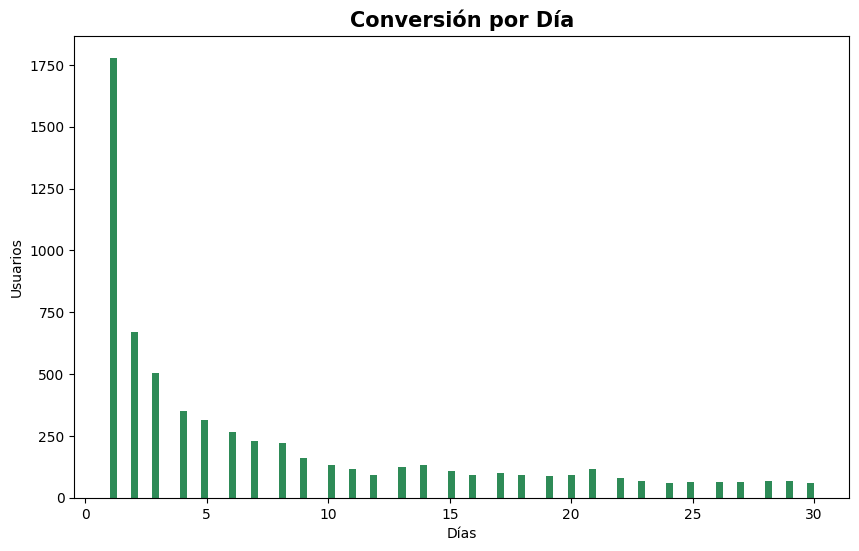

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(users_conversion['days_to_conversion'], bins=100, range=(1, 30), color='seagreen')
plt.title('Conversión por Día', fontsize=15,fontweight="bold")
plt.xlabel('Días')
plt.ylabel('Usuarios')
plt.show()

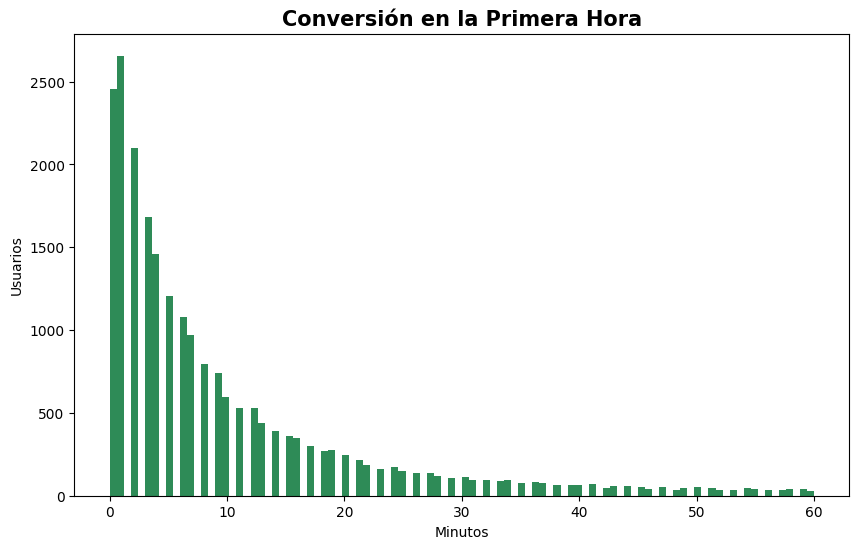

In [48]:
plt.figure(figsize=(10,6))
plt.hist(users_conversion['mins_to_conversion'], bins=100, range=(0, 60), color='seagreen')
plt.title('Conversión en la Primera Hora', fontsize=15,fontweight="bold")
plt.xlabel('Minutos')
plt.ylabel('Usuarios')
plt.show()

In [49]:
conversion_by_day = users_conversion['days_to_conversion'].value_counts().reset_index() 
conversion_by_day

,index,days_to_conversion
0,0,25217
1,1,1779
2,2,671
3,3,504
4,4,351
...,...,...
343,358,1
344,314,1
345,282,1
346,313,1


Al finalizar el análisis de datos se puede observan en ambas graficas las conversiones que realizan los usuarios y se logra apreciar que la mayoría de los usuarios realizan conversiones en el primer día.

• ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [50]:
orders_per_user = df_orders.groupby('uid').agg({'buy_ts': 'count'}).reset_index()
orders_per_user

,uid,buy_ts
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2
...,...,...
36518,18445147675727495770,1
36519,18445407535914413204,3
36520,18445601152732270159,1
36521,18446156210226471712,1


In [51]:
orders_per_user['buy_ts'].mean()

1.3803630588943954

Normalmente los usuarios realizan pedidos de 1.38 a 2 pedios durante un periodo de tiempo dado.

• ¿Cuál es el tamaño promedio de compra?

In [52]:
print('Tamaño promedio de compra: ', round(df_orders['revenue'].mean(),2))

Tamaño promedio de compra:  5.0


El promedio de compra por usuario es de 5 según los datos obtenidos.

• ¿Cuánto dinero traen? (LTV)

In [53]:
#Capturemos los meses a partir de las fechas en las tablas de pedidos y costos:
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')


In [54]:
#1 Ahora recuperemos el mes de la primera compra de cada cliente:
first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [55]:
#2 Calcularemos el número de nuevos clientes (n_buyers) para cada mes:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [56]:
#3 Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientesa la tabla de orders:
order = pd.merge(df_orders,first_orders, on='uid')
order.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [57]:
#4 Agrupar la tabla de orders por mes de la primera compra y mes de la compra y totalizar los ingresos.
cohorts = order.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [58]:
#datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Dado que el LTV se calcula sobre la base de la utilidad bruta en lugar de los ingresos, necesitamos encontrar la utilidad bruta multiplicando los ingresos por la rentabilidad. En teoría, establecimos la tasa de margen, por lo que tenía sentido hacer lo mismo en el proyecto. En la lección teníamos una tasa de margen de 0,5, pero usaré 0,4 como promedio para negocios en línea.


In [59]:
#Las columnas muestran la edad de la cohorte en lugar del mes del pedido
margin_rate = 0.4

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0
1,2017-06-01,2023,2017-07-01,981.82,392.728,1
2,2017-06-01,2023,2017-08-01,885.34,354.136,2
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4


In [60]:
#Dividamos el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte.
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(2)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.89,0.19,0.18,0.38,0.41,0.29,0.38,0.23,0.22,0.24,0.23,0.1
2017-07-01,2.40,0.13,0.25,0.14,0.07,0.06,0.05,0.06,0.06,0.06,0.06,
2017-08-01,2.11,0.19,0.18,0.16,0.2,0.11,0.08,0.16,0.12,0.08,,
2017-09-01,2.26,0.45,0.21,1.59,0.16,0.26,0.28,0.1,0.07,,,
2017-10-01,2.00,0.21,0.08,0.06,0.06,0.05,0.03,0.05,,,,
2017-11-01,2.06,0.16,0.08,0.13,0.06,0.02,0.05,,,,,
2017-12-01,1.90,0.1,0.37,0.43,0.13,0.14,,,,,,
2018-01-01,1.65,0.12,0.12,0.06,0.03,,,,,,,
2018-02-01,1.66,0.11,0.03,0.03,,,,,,,,


In [61]:
#Encontrar el LTV de la primera cohorte sumando el valor de cada mes:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

4.74

Según los datos obtenidos se puede obaservar que los clientes de la primera cohorte generaron $4,74 en ingresos durante sus 12 meses de existencia.

3. Marketing:

• ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [62]:
# calcular los costos por mes
spent = df_costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
spent.columns = ['date', 'average_costs']
spent

,date,average_costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44
...,...,...
359,2018-05-27,532.87
360,2018-05-28,619.44
361,2018-05-29,784.79
362,2018-05-30,1183.00


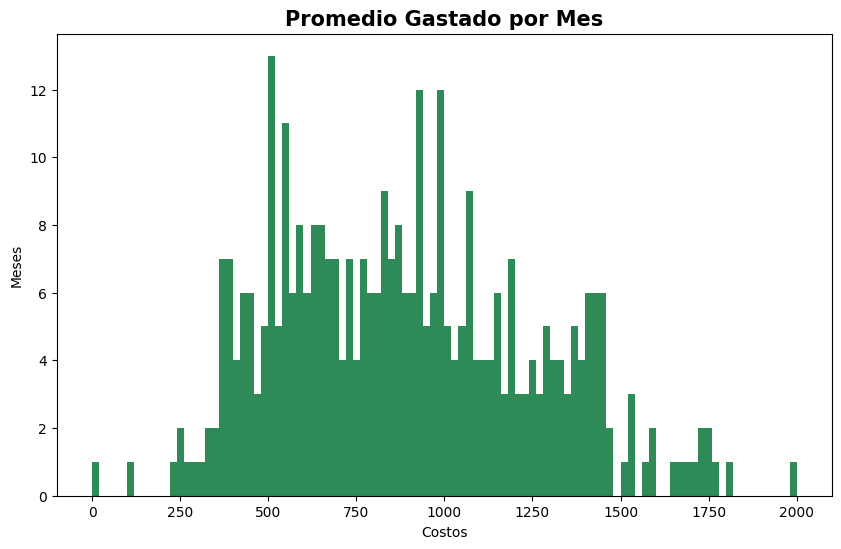

In [63]:
plt.figure(figsize=(10,6))
plt.hist(spent['average_costs'], bins=100, range=(0, 2000), color='seagreen')
plt.title('Promedio Gastado por Mes', fontsize=15, fontweight="bold")
plt.xlabel('Costos')
plt.ylabel('Meses')
plt.show()

• ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [64]:
# obtener la cohorte necesaria
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# calcular los costos para el mes de la cohorte
costs_201706 = df_costs[df_costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 8.905091448344043
LTV = 4.74


• ¿Cuán rentables eran las inversiones? (ROMI)

In [65]:
# calcular los costos por mes
monthly_costs = df_costs.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [66]:
#Agreguemos los datos sobre costos al informe y calculemos el CAC.
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012


In [67]:
#Agreguemos los datos sobre los costos al informe y calculemos el CAC:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,1020,18015.0,8.905091


#Encontremos ROMI (retorno de la inversión en marketing) dividiendo LTV por CAC.
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean'
)

output.cumsum(axis=1).round(2)

Según la información analizada, se puede observar que el CAC es mayor que el LTV, lo que significa que el equipo de marketing gasta más dinero en adquisiciones que los ingresos totales. Es necesario remodelar la estrategia de costos y adquisiciones.

# Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

En promedio, el usuario tiene 1 sesión por día en Y.Afisha y la mayoría se tarda 60 segundos (1 minuto). Para hacer algunas mejoras, se recomendaría al equipo de marketing que utilice el software que permite ver el recorrido del usuario en el sitio y ver si el usuario tiene algún problema al interactuar con el producto, si hay páginas en las que se frustra y decide abandonar. Asimismo, investigar las mismas métricas de los competidores y se haría una comparación.

La mayoría de usuarios toma la decisión de comprar el primer día después del registro. Significa que es muy buena para la empresa, ya que muestra que el proceso de incorporación es simple y se puede esperar la conversión de clientes potenciales desde el primer día. De alguna manera también significa que se debe: a) ser precisos con los cambios en el sitio: a un usuario no le gusta o no ve algo, perdemos un nuevo cliente activo, b) pensar en mejorar la estrategia de marketing: tal vez es necesario enviar promociones especiales u otros materiales publicitarios a aquellos usuarios que no compran en la primera visita.

El CAC es de 8.90 y es mayor que LTV que es de 4.74, lo que significa que el presupuesto de marketing se está utilizando de forma incorrecta. Seria bueno ver el presupuesto desglosado por partidas de costos y analizar más profundamente qué parte se está yendo por el desagüe.

El ROMI es sólo del 53% después de 12 meses, lo que demuestra que el producto no da resultados y que es necesario reestructurar y mejorar el presupuesto de marketing y la estrategia.